[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1jsItz9hRtDWbXhska2rSNb8Uupwo9c1H?usp=sharing)

# Introduction to Tokenizers, LLMs, and Embeddings
This notebook takes you on a journey through fundamental concepts of large language models: tokenization, language model architecture, text generation, and embeddings. Follow along as we explore how text is processed by different types of models and compare their behaviors.

## Setting Up Our Environment

We begin by installing all necessary packages for our exploration. This includes LangChain for building applications with LLMs, OpenAI's libraries, vector stores like Chroma, and various text processing tools. We also install visualization tools and tensor libraries that will help us analyze and display our findings.

In [ ]:
#install all proper packages
!pip install -qU langchain langchain-community langchain-core langchain-openai langchain-text-splitters \
  openai chromadb pypdf xmltodict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.3 MB/s eta 0:00

In [ ]:
!pip install -q tiktoken transformers torch
#!pip install -q https://download.pytorch.org/whl/cu121/torch-2.2.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=1adf430f01ff649c848ac021785e18007b0714fdde68e4e65bd0c640bf3fb8e1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00


In [ ]:
!pip install -U -q bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.8 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [ ]:
!pip freeze | grep "lang\|openai\|tiktoken|\chroma"

google-ai-generativelanguage==0.6.15
google-cloud-language==2.17.1
langchain==0.3.23
langchain-community==0.3.21
langchain-core==0.3.55
langchain-openai==0.3.14
langchain-text-splitters==0.3.8
langcodes==3.5.0
langsmith==0.3.31
language_data==1.3.0
libclang==18.1.1
openai==1.75.0


Next, we set up our API connections. We're configuring LangSmith tracing to help analyze our LLM calls and connecting to OpenAI's API using a key stored in Google Colab's user environment.

In [ ]:
from google.colab import userdata
import os

if userdata.get("LANGSMITH_API_KEY"):
  os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
  os.environ["LANGCHAIN_TRACING_V2"]="true"
  os.environ["LANGSMITH_API_KEY"] = userdata.get("LANGSMITH_API_KEY")
  os.environ["LANGSMITH_PROJECT"] = "genai-for-business-test"

In [ ]:
# Set OpenAI API key from Google Colab's user environment or default
def set_openai_api_key(default_key: str = "YOUR_API_KEY") -> None:
    """Set the OpenAI API key from Google Colab's user environment or use a default value."""

    os.environ["OPENAI_API_KEY"] = userdata.get("TT_OPENAI_KEY") or default_key


set_openai_api_key()
#set_openai_api_key("sk-...")

## Exploring Data Processing with LLMs

Before diving into models, we need data to work with. This section prepares us for analyzing how different text samples will be processed by various tokenizers and models. We're setting the stage for comparing English and Italian text to observe how language models handle different languages.

In [ ]:
import pprint

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_openai import OpenAIEmbeddings
from sentence_transformers import SentenceTransformer
# Import necessary libraries
from transformers import (
  AutoTokenizer,
  AutoModel,
  GPT2Tokenizer,
  GPT2LMHeadModel,
  AutoModelForSeq2SeqLM,
  AutoModelForCausalLM
)

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Understanding Tokenization Across Different Architecture Types

Now we dive into the heart of language processing - tokenization. This process converts raw text into numerical representations that models can work with. We'll examine how three major model architectures handle tokenization differently: encoders (like BERT), decoders (like GPT), and encoder-decoders (like T5).

Each architecture has its own tokenization strategy that affects how it processes and understands text. We'll test identical phrases in English and Italian to see these differences in action.

In [ ]:
input_text = "Welcome to the Generative AI: Creating a LLM Chatbot for Business bootcamp"
input_text_it = "Benvenuti al bootcamp IA generativa: creazione di un chatbot LLM per le aziende"

BERT, as an encoder architecture, processes the entire input at once. Notice how it tokenizes our English and Italian texts differently. The tokenizer breaks down words into subwords, and you can see that the Italian text produces different token IDs than English due to vocabulary differences. BERT's tokenization is particularly optimized for bidirectional understanding of context.

In [ ]:
## Encoder
# Load the tokenizer and model
model = AutoModel.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer(input_text, return_tensors='pt').input_ids

tensor([[  101,  6160,  2000,  1996, 11416,  6024,  9932,  1024,  4526,  1037,
          2222,  2213, 11834, 18384,  2005,  2449,  9573, 26468,   102]])

In [ ]:
tokenizer(input_text_it, return_tensors='pt').input_ids

tensor([[  101,  3841,  8159, 21823,  2632,  9573, 26468, 24264, 11416, 29068,
          2050,  1024, 13675,  5243, 20574,  4487,  4895, 11834, 18384,  2222,
          2213,  2566,  3393, 17207,  9013,  3207,   102]])

GPT-2, as a decoder model, processes text sequentially from left to right. Its tokenization scheme is designed for predicting the next token in a sequence. Notice how its tokenization of Italian text differs from BERT's - GPT-2 might split words differently since its vocabulary was trained primarily on English web text.

In [ ]:
## Decoder
# Load the tokenizer and model
model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
tokenizer(input_text, return_tensors='pt').input_ids

tensor([[14618,   284,   262,  2980,   876,  9552,    25, 30481,   257, 27140,
            44, 24101, 13645,   329,  7320,  6297, 16544]])

In [ ]:
tokenizer(input_text_it, return_tensors='pt').input_ids

tensor([[11696,   574, 47966,   435,  6297, 16544, 35229,  1152,   265, 12151,
            25,  1126,  1031,  7935,  2566,   555,  8537, 13645, 27140,    44,
           583,   443,   257, 17027, 38396]])

T5 combines both encoder and decoder architectures, making it suitable for tasks like translation and summarization. Its tokenizer handles multilingual text differently than either BERT or GPT-2, often with more flexibility across languages since it was trained on multilingual data.

In [ ]:
## Encoder-Decoder
# Load the tokenizer and model
model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-base")
tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-base")
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
tokenizer(input_text, return_tensors='pt').input_ids

tensor([[ 5242,    12,     8,  5945,    49,  1528,  7833,    10,     3, 18120,
             3,     9,   301, 11160,  9802,  4045,    21,  1769,  7378, 12389,
             1]])

In [ ]:
tokenizer(input_text_it, return_tensors='pt').input_ids

tensor([[ 2798,   162,  4796,    23,   491,  7378, 12389,    27,   188, 11467,
          4572,     9,    10, 11983, 26566,  1227,    73,  3582,  4045,   301,
         11160,   399,    90, 11470,  3406,     1]])

## Building a Text Generation Framework
With tokenization understood, we now advance to text generation. This requires managing the complex search process through token probability space. We'll create visualization tools to understand this process and implement a greedy search algorithm to generate text completions.

In [ ]:
import time
import locale

locale.getpreferredencoding = lambda: "UTF-8"

Our `GraphManager` class creates a tree structure to represent possible token sequences. Each node in the tree represents a token, with attributes tracking its probability score and position in the sequence. This structure will help us visualize the token selection process during text generation.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

class GraphManager:
    def __init__(self, beams=1, length=5, text=""):
        self.beams = beams
        self.length = length
        self.text = text
        self.graph = self.create_graph()

    def create_graph(self):
        graph = nx.balanced_tree(self.beams, self.length, create_using=nx.DiGraph())
        nx.set_node_attributes(graph, 100, "tokenscore")
        nx.set_node_attributes(graph, 0, "sequencescore")
        nx.set_node_attributes(graph, 0, "cumscore")
        nx.set_node_attributes(graph, self.text, "token")
        return graph

    def get_best_sequence(self):
        """
        Get the best sequence of tokens and its maximum score.

        Parameters:
            graph (nx.DiGraph): The graph representing the sequences.

        Returns:
            tuple: A tuple containing the best sequence and its maximum score.
        """
        # Create a list of leaf nodes
        leaf_nodes = [node for node in self.graph.nodes() if self.graph.out_degree(node) == 0]

        # Get the leaf node with the highest sequencescore
        max_score_node = max(
            leaf_nodes, key=lambda node: self.graph.nodes[node]["sequencescore"]
        )

        # Retrieve the sequence of nodes from this leaf node to the root node in a list
        path = nx.shortest_path(self.graph, source=0, target=max_score_node)

        # Return the string of token attributes of this sequence
        sequence = " ".join([self.graph.nodes[node]["token"].split("_")[0] for node in path])

        return sequence, self.graph.nodes[max_score_node]["sequencescore"]

The `plot_graph` function creates beautiful visualizations of our token selection tree. Each node is color-coded based on token probability, helping us understand which tokens the model considers most likely at each step of generation.

In [ ]:
def plot_graph(graph, score, args=""):
    """
    Plot the graph with nodes colored based on scores.

    Parameters:
        score (str): Score type, either 'token' or 'sequence'.
        cmap_name (str, optional): The name of the colormap. Defaults to 'rg'.
    """

    width, height = 3 + 1.2 * graph.beams**graph.length, max(4, 2 + graph.length)
    if args == '-Grankdir="LR"':
        height = 2
    fig, ax = plt.subplots(figsize=(width, height), dpi=300, facecolor="white")

    # Create positions for each node
    pos = nx.nx_agraph.graphviz_layout(graph.graph, prog="dot", args=args)

    # Determine the data key based on the score type
    score_key = "tokenscore" if score == "token" else "sequencescore"

    # Extract scores and compute normalization parameters
    node_data = graph.graph.nodes(data=True)
    scores = [data[score_key] for _, data in node_data if data["token"] is not None]
    vmin, vmax = min(scores), max(scores)
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # Create a colormap with three colors
    cmap = LinearSegmentedColormap.from_list("rg", ["r", "y", "g"], N=256)

    # Draw the nodes with colors based on their scores
    node_colors = [
        data[score_key] for _, data in node_data if data["token"] is not None
    ]

    nx.draw_networkx_nodes(
        graph.graph,
        pos,
        node_size=2000,
        node_shape="o",
        alpha=1,
        linewidths=4,
        node_color=node_colors,
        cmap=cmap,
    )

    # Draw the edges
    nx.draw_networkx_edges(graph.graph, pos)

    # Prepare node labels based on the score type
    label_format = "{:.2f}%" if score == "token" else "{:.2f}"
    labels = {
        node: f"{data['token'].split('_')[0]}\n{label_format.format(data[score_key])}"
        for node, data in node_data
        if data["token"] is not None
    }

    # Draw the labels
    nx.draw_networkx_labels(graph.graph, pos, labels=labels, font_size=10)
    plt.box(False)

    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    label_text = "Token probability (%)" if score == "token" else "Sequence score"
    fig.colorbar(sm, ax=ax, orientation="vertical", pad=0, label=label_text)

    plt.show()

### Implementing Greedy Text Generation
Now we implement the core text generation algorithm. The `GreedyTextGenerator` class will use our language model to predict the next most likely tokens given an input prompt, building sequences token by token.

In [1]:
class GreedyTextGenerator:
    def __init__(self, model, tokenizer, beams=1, decoder_mode=False):
        self.model = model
        self.tokenizer = tokenizer
        self.decoder_mode = decoder_mode
        self.beams = beams

    def _greedy_sampling(self, logits):
        return torch.topk(logits, self.beams).indices


    def run_greedy(self, text, number_of_outputs):
        # Ensure input is on the same device as the model
        encoded_input_ids = self.tokenizer(text).input_ids
        encoded_input_ids = torch.tensor(encoded_input_ids, dtype=torch.long).unsqueeze(dim=0).to(self.model.device)

        decoder_input_ids = None
        if self.decoder_mode:
            decoder_input_ids = torch.tensor([self.model.config.decoder_start_token_id],
                                              dtype=torch.long).unsqueeze(dim=0).to(self.model.device)

        graph_manager = GraphManager(beams=self.beams, length=number_of_outputs, text=text)

        self._greedy_search(encoded_input_ids, 0, number_of_outputs, graph_manager.graph, decoder_input_ids)
        return graph_manager

    def _greedy_search(self, encoded_input, node, length, graph, decoder_input=None):
        if length:
            # Ensure inputs are on the same device
            if decoder_input is not None:
                outputs = self.model(input_ids=encoded_input, decoder_input_ids=decoder_input)
            else:
                outputs = self.model(encoded_input)

            logits = outputs.logits[0, -1, :]
            top_token_ids = self._greedy_sampling(logits)

            for j, token_id in enumerate(top_token_ids):
                # Ensure new tensors are on the same device
                if decoder_input is not None:
                    new_encoded_inputs = torch.cat((decoder_input,
                                                    torch.tensor([token_id], dtype=torch.long)
                                                    .unsqueeze(dim=0)
                                                    .to(self.model.device)),
                                                  dim=1)
                else:
                    new_encoded_inputs = torch.cat((encoded_input,
                                                    torch.tensor([token_id], dtype=torch.long)
                                                    .unsqueeze(dim=0)
                                                    .to(self.model.device)),
                                                  dim=1)

                current_node = list(graph.successors(node))[j]
                token_score = torch.log(torch.softmax(logits, dim=-1)[token_id])
                cumulative_score = graph.nodes[node]["cumscore"] + token_score.item()

                graph.nodes[current_node].update({
                    "tokenscore": np.exp(token_score.item()) * 100,
                    "cumscore": cumulative_score,
                    "sequencescore": 1 / (len(new_encoded_inputs.squeeze())) * cumulative_score,
                    "token": self.tokenizer.decode(token_id, skip_special_tokens=True) + f"_{length}_{j}"
                })

                # Recursively call with device-consistent inputs
                if decoder_input is not None:
                    self._greedy_search(encoded_input, current_node, length - 1, graph, decoder_input=new_encoded_inputs)
                else:
                    self._greedy_search(new_encoded_inputs, current_node, length - 1, graph, decoder_input)

The greedy search algorithm always selects the highest probability token at each step. With our "beams" parameter set to 3, it will explore the top 3 most likely tokens at each step, creating a branching tree of possibilities. This implementation handles both encoder-only and decoder-only model architectures.

## Running Text Generation with a Large Language Model
Let's put our text generation system to work using a powerful language model. We'll use a prompt about the "secret of a perfect dinner" and see what the model generates.

In [ ]:
TEXT = "The secret of a perfect dinner is"
NUMBER_OF_OUTPUTS = 4

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("unsloth/DeepSeek-R1-Distill-Llama-8B-unsloth-bnb-4bit")
model = AutoModelForCausalLM.from_pretrained("unsloth/DeepSeek-R1-Distill-Llama-8B-unsloth-bnb-4bit")
model.to(device)

tokenizer_config.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096, padding_idx=128004)
    (layers): ModuleList(
      (0): LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
      (1): LlamaDecoder

We're using DeepSeek's 8B parameter Llama model, a powerful but efficient LLM that balances performance and speed. The beam parameter of 3 means we're exploring the top 3 most likely tokens at each step, giving us a broader view of the model's generation process. The visualized tree helps us understand which token sequences the model considers most probable.

In [ ]:
text_generator = GreedyTextGenerator(model, tokenizer, decoder_mode=False, beams = 3)
graph_m = text_generator.run_greedy(TEXT, NUMBER_OF_OUTPUTS)

In [ ]:
sequence, max_score = graph_m.get_best_sequence()
print(f"Generated text: {sequence}, score: {max_score}")

Generated text: The secret of a perfect dinner is  not  just  the  food, score: -0.22870890299479166


In [ ]:
# Plot graph
plot_graph(graph_m, "token")

In [ ]:
import pickle

with open('deepseek.pickle', 'wb') as f:
    pickle.dump(graph_m.graph, f)

with open('deepseek.pickle', 'rb') as f:
    G = pickle.load(f)

In [ ]:
#uplG = GraphManager(beams=1, length=4)

In [ ]:
#uplG.graph = G

In [ ]:
#plot_graph(uplG, "token")

## Exploring Text Embeddings and Similarity
In the final section, we shift focus to embeddings - dense vector representations of text that capture semantic meaning. We'll compare three different embedding models by examining how they encode similar concepts.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch

def compute_similarity_matrix(embeddings_list):
    """Computes the cosine similarity matrix from a list of embeddings."""
    num_sentences = len(embeddings_list)
    similarity_matrix = np.zeros((num_sentences, num_sentences))

    for i in range(num_sentences):
        for j in range(i, num_sentences):  # Iterate only upper triangular part
            if isinstance(embeddings_list, torch.Tensor):
                _embeddings_list = embeddings_list.detach().numpy()
                embedding_i, embedding_j = [list(_embeddings_list[i])], [list(_embeddings_list[j])]
            else:
                embedding_i, embedding_j = [embeddings_list[i]], [embeddings_list[j]]
            #similarity = np.dot(embedding_i, embedding_j)
            similarity = np.ndarray.flatten(cosine_similarity(embedding_i, embedding_j))[0]
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Fill symmetric part

    np.fill_diagonal(similarity_matrix, 1)
    return similarity_matrix

def get_embeddings(model, sentences, use_encode=True):
    """Gets embeddings for sentences using a specified model."""
    if not use_encode:
        embeddings_list = [model.embed_query(s) for s in sentences]
    else:
        embeddings_list = model.encode(sentences)
    return embeddings_list

We've created helper functions to calculate embedding vectors and measure their similarities using cosine similarity. This will help us analyze how different models understand semantic relationships between sentences.

We're testing three top embedding models:

- `MPNet` - A Transformer model that combines BERT's bidirectional context and XLNet's permutation-based training
- `OpenAI text-embedding-3-large` - OpenAI's powerful and recent embedding model with 3072 dimensions
- `BGE-M3` - ByteDance's multilingual embedding model optimized for semantic search

Our test sentences deliberately include ambiguous phrases and related concepts to see how each model handles semantic subtleties around "flying" and "fear."

In [ ]:
# Initialize models
mpnet_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
openai_embedding = OpenAIEmbeddings(model="text-embedding-3-large")
bge_embedding = SentenceTransformer("BAAI/bge-m3")
#sci_model = SentenceTransformer('fine-tuned/jinaai_jina-embeddings-v2-base-en-scientific-papers-from-arxiv', trust_remote_code=True)

<ipython-input-33-aeeb263bf6b3>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  mpnet_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
sentences = [
    "I like flying",
    "I have aerophobia",
    "I'm scared to fly",
    "A fly can scare me",
    "I fear scary pictures of airplanes in the clouds",
    "I have airplane photos in my cloud"
]

In [ ]:
# Generate embeddings and similarity matrices
mpnet_embeddings_list = get_embeddings(mpnet_embeddings, sentences, use_encode=False)
mpnet_matrix = compute_similarity_matrix(mpnet_embeddings_list)

openai_embeddings_list = get_embeddings(openai_embedding, sentences, use_encode=False)
openai_matrix = compute_similarity_matrix(openai_embeddings_list)

bge_embeddings_list = get_embeddings(bge_embedding, sentences)
bge_matrix = compute_similarity_matrix(bge_embeddings_list)

In [ ]:
np.average(mpnet_matrix), np.average(openai_matrix), np.average(bge_matrix)

(np.float64(0.5833768203323061),
 np.float64(0.5583354016407078),
 np.float64(0.7632300522592332))

The heatmaps visualize similarity scores between each pair of sentences for each embedding model. Warmer colors indicate higher similarity. By comparing these heatmaps, we can see how each model understands semantic relationships differently:

- Notice how sentences 2 and 3 ("I have aerophobia" and "I'm scared to fly") are highly similar in all models, correctly capturing their semantic equivalence
- The OpenAI model seems particularly good at distinguishing between "A fly can scare me" (about the insect) and other sentences about aviation
- BGE-M3 seems to capture more detailed relationships between sentences about fear and flying

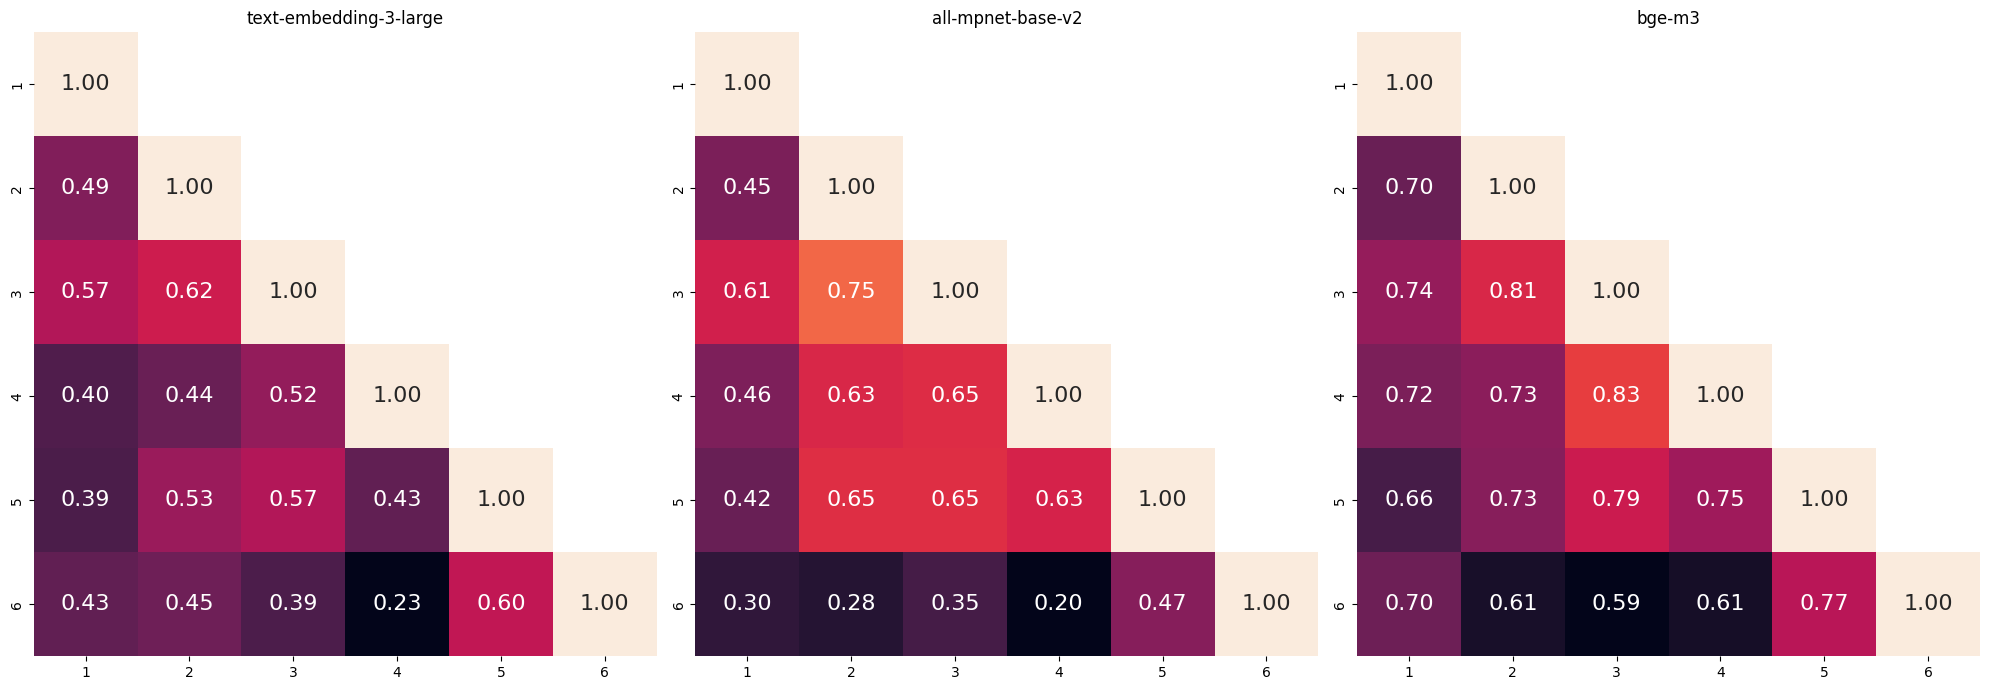

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 7))  # Adjust the figure size as needed

# Create a mask
mask = np.triu(np.ones_like(openai_matrix, dtype=bool))
np.fill_diagonal(mask, False)

# Creating a 2x3 grid of heatmaps
heatmaps = [
    (openai_matrix, "text-embedding-3-large"),
    (mpnet_matrix, "all-mpnet-base-v2"),
    (bge_matrix, "bge-m3"),
]

for idx, (matrix, title) in enumerate(heatmaps, start=1):
    plt.subplot(1, 3, idx)
    sns.heatmap(matrix, mask=mask, fmt='.2f', xticklabels=[x+1 for x in range(len(sentences))], yticklabels=[x+1 for x in range(len(sentences))], annot=True, cbar=False, annot_kws={"fontsize": 16})
    plt.title(title)

# Show the plot
plt.tight_layout()
plt.show()

## LangChain
Finally, we demonstrate how to use OpenAI's GPT models through the LangChain framework, which simplifies working with LLMs in applications.

We're using GPT-4o mini with temperature set to 0 for deterministic, consistent outputs. The temperature parameter is crucial during training and inference - lower values (like 0) make the model choose the most probable tokens, while higher values increase randomness and creativity. Here we want precision rather than creativity, so we use a zero temperature.

In [ ]:
from langchain_openai import ChatOpenAI

In [ ]:
model_name = "gpt-4o-mini"
verbose= True

In [ ]:
llm = ChatOpenAI(temperature=0, model_name=model_name)

In [ ]:
TEXT

'The secret of a perfect dinner is'

In [ ]:
response = llm.invoke(TEXT)

In [ ]:
print(response.content)

The secret of a perfect dinner lies in a combination of several key elements:

1. **Quality Ingredients**: Start with fresh, high-quality ingredients. Seasonal produce, good cuts of meat, and fresh herbs can elevate any dish.

2. **Balanced Menu**: Create a well-rounded menu that includes a variety of flavors and textures. Consider appetizers, a main course, sides, and dessert that complement each other.

3. **Preparation**: Plan ahead and prep as much as possible before your guests arrive. This allows you to enjoy the evening rather than being stuck in the kitchen.

4. **Ambiance**: Set the mood with appropriate lighting, music, and table settings. A warm, inviting atmosphere enhances the dining experience.

5. **Personal Touch**: Incorporate personal touches, whether it’s a family recipe, a favorite dish of your guests, or a themed dinner that reflects a shared interest.

6. **Good Company**: The people you share the meal with can make all the difference. Invite guests who will enjoy